In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.columns = ['Serial', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit']

In [4]:
df.head()

,Serial,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [5]:
df['GRE_Norm'] = df['GRE'] /350

In [6]:
df.head()

,Serial,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit,GRE_Norm
0,1,337,118,4,4.500,4.500,9.650,1,0.920,0.963
1,2,324,107,4,4.000,4.500,8.870,1,0.760,0.926
2,3,316,104,3,3.000,3.500,8.000,1,0.720,0.903
3,4,322,110,3,3.500,2.500,8.670,1,0.800,0.920
4,5,314,103,2,2.000,3.000,8.210,0,0.650,0.897


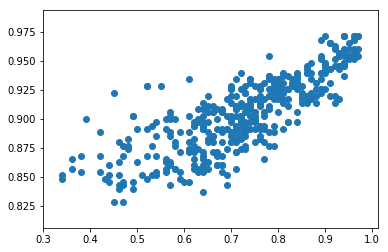

In [7]:
x = df['Admit'].values.reshape(-1, 1)
y = df['GRE_Norm']
plt.scatter(x,y)
plt.show()

## OLS Regression Model: 

Coefficients: 
 [0.18449741]
Intercept: 
 0.771523584462964
R-Square: 

0.6441835498438333


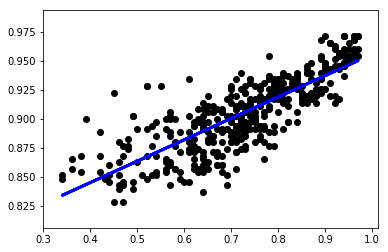

In [8]:
regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-Square: \n')
print(regr.score(x,y))
plt.scatter(x, y, color = 'black')
plt.plot(x, regr.predict(x), color = 'blue', linewidth = 3)
plt.show()

In [9]:
#Cross Validation 
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x, y, cv=3)

array([0.47152383, 0.61151087, 0.66676311])

In [10]:
#HOLD OUT GROUP ACCURACY 
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x, y).score(x, y)))

With 20% Holdout: 0.5551115149229184
Testing on Sample: 0.6441835498438333


## KNN Regression Model: 

In [11]:
from sklearn import neighbors

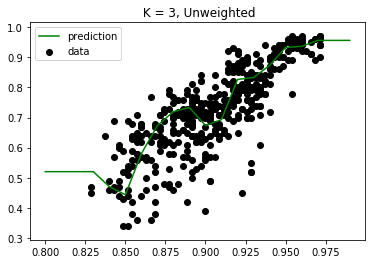

In [12]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
x1 = df['GRE_Norm'].values.reshape(-1, 1)
y1 = df['Admit']
knn.fit(x1, y1)
T = np.arange(0.8, 1, 0.01) [:, np.newaxis]
Y_ = knn.predict(T)
plt.scatter(x1, y1, c = 'k', label = 'data')
plt.plot(T, Y_, c = 'g', label = 'prediction')
plt.title(' K = 3, Unweighted')
plt.legend()
plt.show()


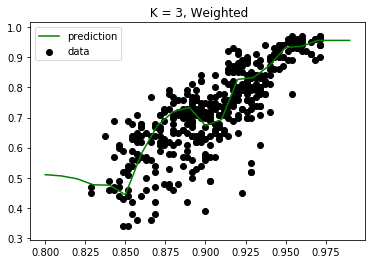

In [13]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
x1 = df['GRE_Norm'].values.reshape(-1, 1)
y1 = df['Admit']
knn_w.fit(x1, y1)
T = np.arange(0.8, 1, 0.01) [:, np.newaxis]
Y_ = knn_w.predict(T)
plt.scatter(x1, y1, c = 'k', label = 'data')
plt.plot(T, Y_, c = 'g', label = 'prediction')
plt.title(' K = 3, Weighted')
plt.legend()
plt.show()



In [14]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x1, y1, cv=3)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, x1, y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.39 (+/- 0.40)
Weighted Accuracy: 0.50 (+/- 0.31)
